# Calculating indicatiors using API

## How to calculate RSI?

RSI = 100 - 100/(1 + RS)<br/>
RS is the relative strength which is calculated in the following way:<br/>
RS = AvgUp/AvgDown<br/>

AvgUp = average of the upward variations of the price udring period N<br/>
AvgDown = average of the downward variations of the price during period N<br/>
N is the period for which the RSI is calculated and it's usually 14 days.<br/>

For example:<br/>
during the past 14 days, the price of a specific asset has increased 1% for 7 days and decreased 0.5% for another 7. Uder these conditions the RSI is calculated as:<br/>
AvgUp = 1% / 14 = 0.00071<br/>
AvgDown = 0.5% / 14 = 0.00035<br/>
RS = 0.00017/0.00035 = 2<br/>
RSI = 100 - 100/(1 + 2) = 66.6<br/>

If the result is > 70 the price is considered overpriced and it will dcrease in the future<br/>
If the result is < 30 the price is considered underpriced and it will increase in the future

## Moving Average

![](https://www.orderhive.com/wp-content/uploads/2019/04/Moving-Average.png)

In [8]:
from alpha_vantage.timeseries import TimeSeries
from alpha_vantage.techindicators import TechIndicators
import pandas as ps
import matplotlib.pyplot as plt
import configparser

In [9]:
config = configparser.ConfigParser()
config.read("config.cfg")

api_key = config['KEYS']['ALPHA_VENTAGE_API_KEY']

In [12]:
period = 6

indicators = TechIndicators(api_key, output_format="pandas")

data_rsi, meta_data_rsi = indicators.get_rsi(symbol="MSFT", interval="1min", time_period=period, series_type="close")
data_sma, meta_data_sma = indicators.get_sma(symbol="MSFT", interval="1min", time_period=period, series_type="close")

In [13]:
data_rsi

,RSI
date,
2021-09-02 04:26:00,57.1429
2021-09-02 04:29:00,73.8155
2021-09-02 05:48:00,54.3119
2021-09-02 05:49:00,54.3119
2021-09-02 05:57:00,45.6311
...,...
2021-09-15 19:53:00,73.3512
2021-09-15 19:55:00,56.8873
2021-09-15 19:56:00,41.0804


In [14]:
data_sma

,SMA
date,
2021-09-02 04:18:00,302.5283
2021-09-02 04:26:00,302.5400
2021-09-02 04:29:00,302.5733
2021-09-02 05:48:00,302.5733
2021-09-02 05:49:00,302.5733
...,...
2021-09-15 19:53:00,305.2200
2021-09-15 19:55:00,305.2317
2021-09-15 19:56:00,305.2233


In [16]:
df1 = data_sma.iloc[1::]
df2 = data_rsi

df1.index = df2.index

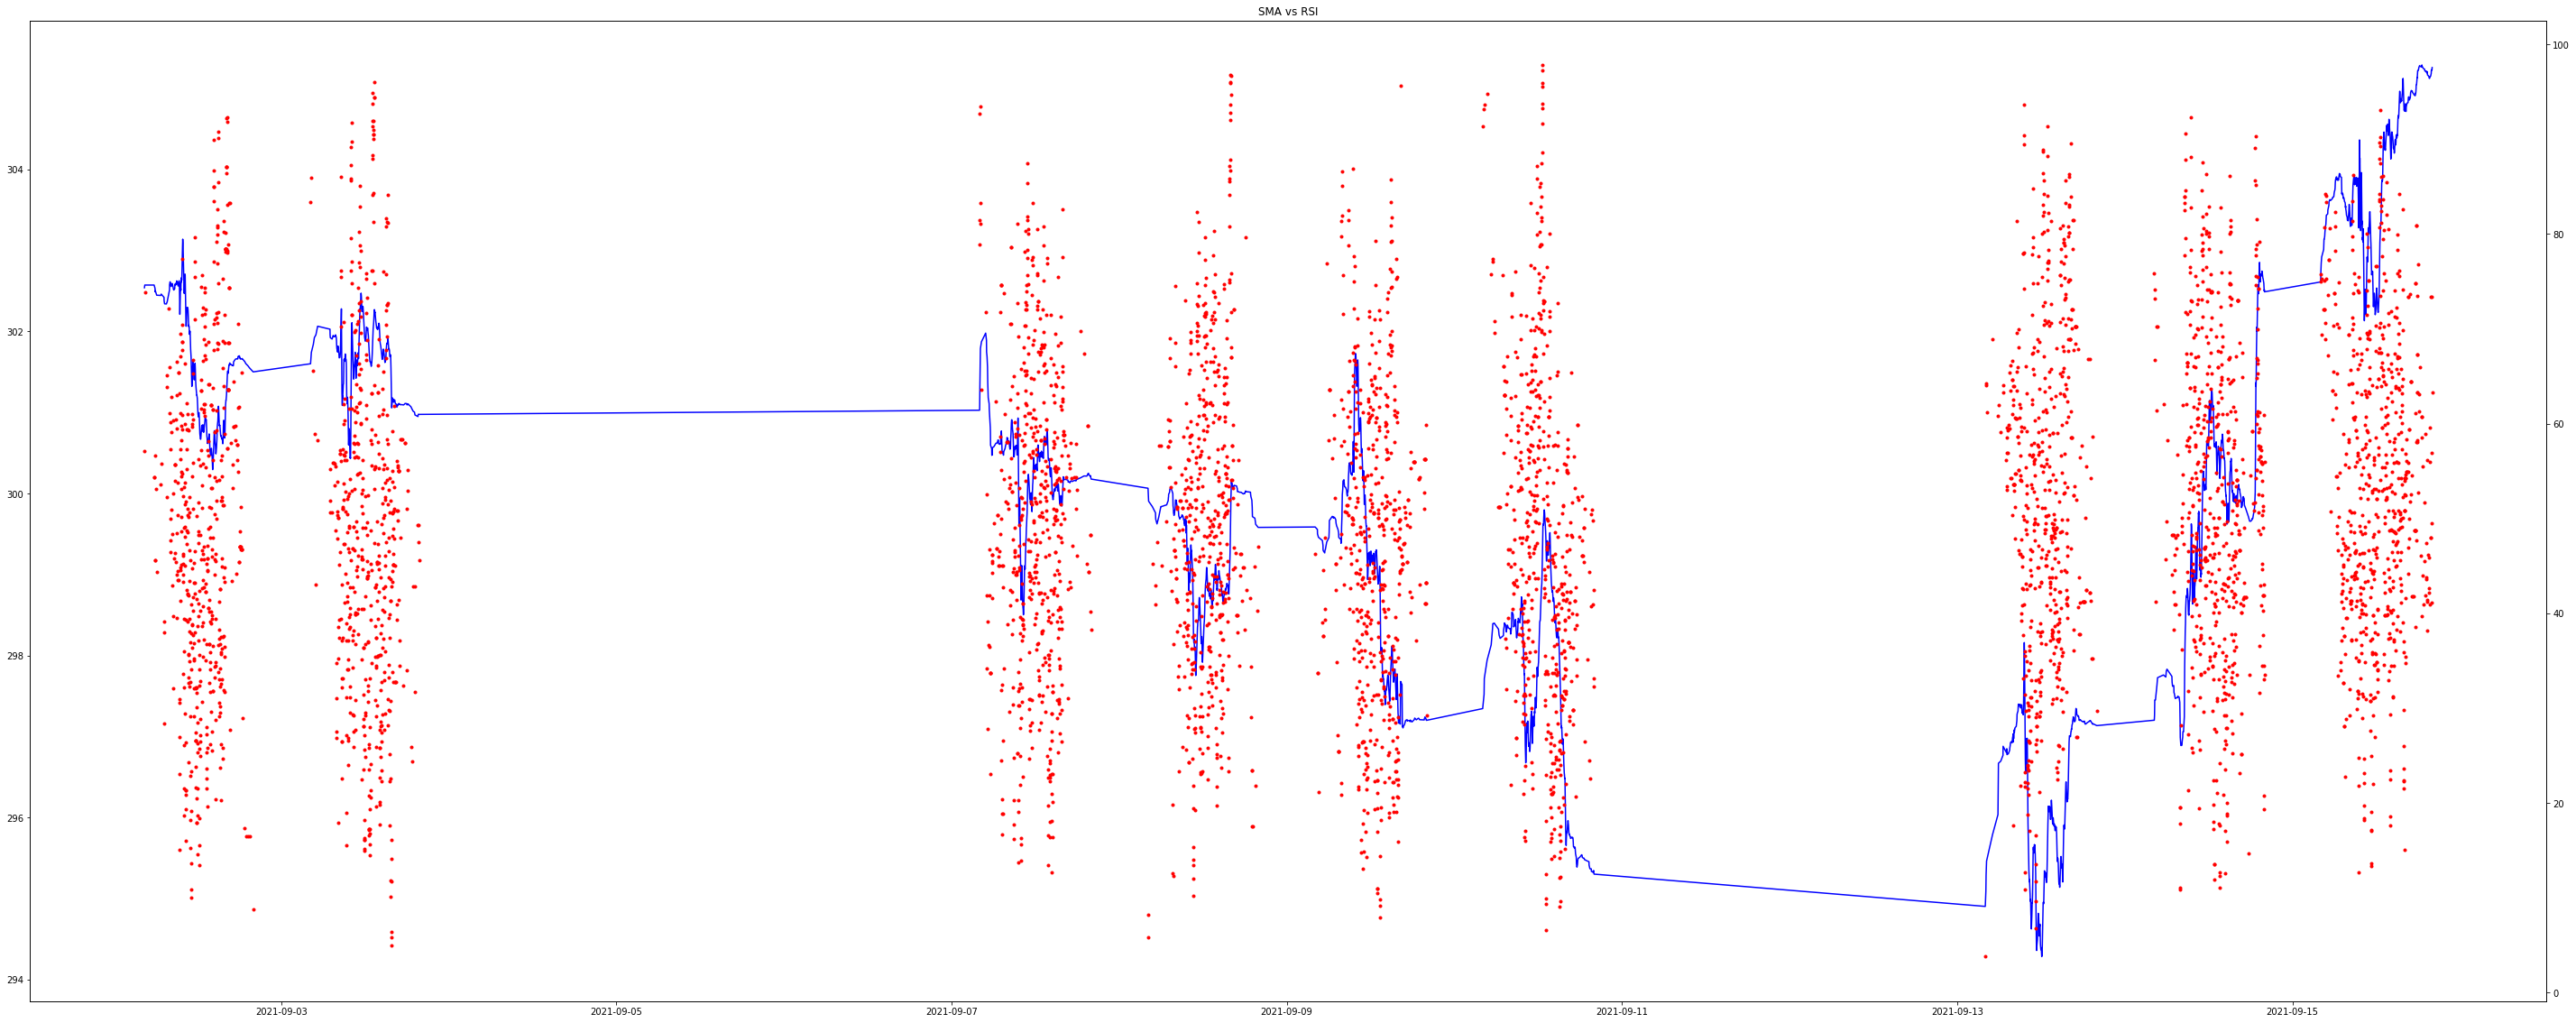

In [17]:
fig, ax1 = plt.subplots(figsize=(50, 20))
ax1.plot(df1, 'b-')
ax2 = ax1.twinx()
ax2.plot(df2, 'r.')
plt.title("SMA vs RSI")
plt.show()